<a href="https://colab.research.google.com/github/kurav/CMPE257-Fall23-Varshith-Kura/blob/class-activities/Class_Activity_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [32]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold

In [33]:
import random

## Generates N random points for logistic regression on a line w
def generate_lr(N=20,w0=0,w1=1):
    n = 0
    X1 = []
    Y = []
    while(n < N):
        x1 = random.uniform(-10,10)
        x2 = random.uniform(-1,1)
        y = w0 + w1*x1 + x2
        X1.append(x1)
        Y.append(y)
        n += 1
    data = [np.array([1,X1[i],Y[i]]) for i in range(N)]
    return data

In [34]:
f_w0, f_w1 = 1, 1
N = 50
data = generate_lr(N, f_w0, f_w1)

In [35]:
def abline(slope, intercept, color='b'):
    """Plot a line from slope and intercept"""
    axes = plt.gca()
    x_vals = np.array(axes.get_xlim())
    y_vals = intercept + slope * x_vals
    plt.plot(x_vals, y_vals, '--', label = "x_2="+str(slope)+"x_1+"+str(intercept), c=color )

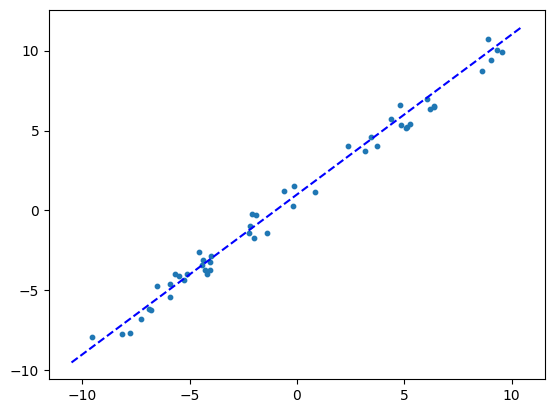

In [36]:
X1 = [i[1] for i in data]
Y  = [i[2] for i in data]
markers = [] #'o' or '+'
colors = [] # 'b' or 'r'
cnt = 0
plt.scatter(X1,Y, s = 10)

abline(f_w1,f_w0)
plt.show()

In [37]:
X = [[i[0], i[1]] for i in data]
Y  = [i[2] for i in data]

In [38]:
XtX = np.matmul(np.transpose(X), X)
XtX.shape

(2, 2)

In [39]:
XtX_inv = np.linalg.inv(XtX)
XtX_inv.shape
XtX_inv

array([[0.02010293, 0.00026087],
       [0.00026087, 0.00066117]])

In [40]:
X_pi = np.matmul(XtX_inv, np.transpose(X))
X_pi

array([[ 0.01905743,  0.02171965,  0.02107423,  0.01904388,  0.01900703,
         0.01872852,  0.02136685,  0.01839881,  0.01820532,  0.02031797,
         0.02124934,  0.02176774,  0.02245993,  0.01876686,  0.01905166,
         0.01807517,  0.0217665 ,  0.01830479,  0.01896119,  0.02142213,
         0.02136116,  0.01761144,  0.01855353,  0.02143906,  0.01898265,
         0.02235394,  0.02252817,  0.01961043,  0.0195526 ,  0.02147204,
         0.02005155,  0.02007096,  0.01958558,  0.01890656,  0.02259418,
         0.0185602 ,  0.01973461,  0.02092765,  0.01832651,  0.02242304,
         0.01866547,  0.01861556,  0.01895127,  0.01993933,  0.02072187,
         0.01952299,  0.01797269,  0.02168518,  0.02099792,  0.01953688],
       [-0.00238897,  0.00435847,  0.00272265, -0.00242331, -0.00251668,
        -0.00322259,  0.0034643 , -0.00405823, -0.00454865,  0.00080589,
         0.00316647,  0.00448035,  0.00623471, -0.00312541, -0.00240358,
        -0.00487851,  0.00447723, -0.00429652, -0.

In [41]:
w = np.matmul(X_pi, Y)
w

array([0.84033746, 0.97138421])

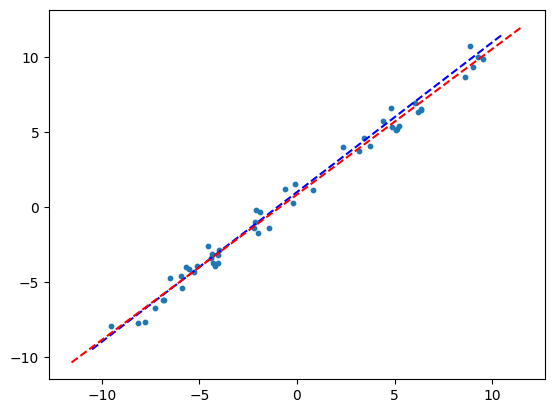

In [42]:
X1 = [i[1] for i in data]
Y  = [i[2] for i in data]
plt.scatter(X1,Y, s = 10)

abline(f_w1,f_w0)
abline(w[1],w[0], color='r')
plt.show()

In [43]:
Y_pred = np.matmul(X, w)
np.sum(np.square(Y_pred-Y))
MSE = np.sum(np.square(Y_pred - Y)) / N

In [44]:
w_other = [3, 2]
Y_other = np.matmul(X, w_other)
np.sum(np.square(Y_other-Y))

1771.7317352929865

In [45]:
#50 test samples
testdata = generate_lr(50, f_w0, f_w1)
X_test = [[i[0], i[1]] for i in testdata]
Y_test  = [i[2] for i in testdata]
Y_pred_test = np.matmul(X_test, w)
np.sum(np.square(Y_pred_test-Y_test))
MSE_test = np.sum(np.square(Y_pred_test - Y_test)) / 50

In [46]:
Y_pred_test_target = np.matmul(X_test, [1, 1])
MSE_target = np.sum(np.square(Y_pred_test_target - Y_test)) / 50
np.sum(np.square(Y_pred_test_target-Y_test))

15.539165193554867

In [47]:
Y_pred = np.matmul(X, w)
mse = np.sum(np.square(Y_pred - Y))
w_other = [1,1]
Y_other = np.matmul(X, w_other)
mse_other = np.sum(np.square(Y_other - Y))

In [48]:
testdata = generate_lr(50, f_w0, f_w1)
X_test = [[i[0], i[1]] for i in testdata]
Y_test = [i[2] for i in testdata]
Y_pred_test = np.matmul(X_test, w)
mse_test = np.sum(np.square(Y_pred_test - Y_test))

In [49]:
Y_pred_test_target = np.matmul(X_test, [1, 1])
mse_test_target = np.sum(np.square(Y_pred_test_target - Y_test))

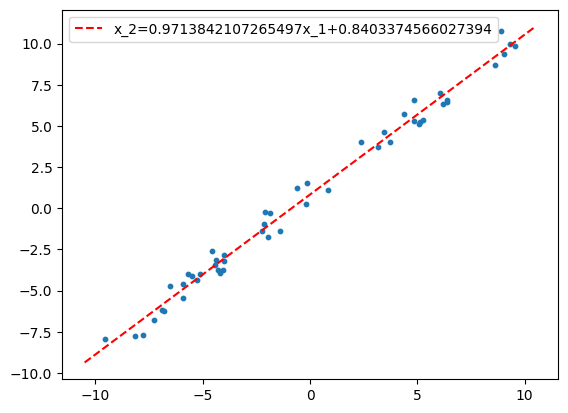

In [50]:
alpha = 0
I = np.identity(2)  # Identity matrix for regularization
XtX = np.matmul(np.transpose(X), X)
XtX_reg = XtX + alpha * I
XtX_reg_inv = np.linalg.inv(XtX_reg)
X_pi = np.matmul(XtX_reg_inv, np.transpose(X))
w = np.matmul(X_pi, Y)

X1 = [i[1] for i in data]
Y = [i[2] for i in data]
plt.scatter(X1, Y, s=10)
abline(w[1], w[0], color='r')
plt.legend()
plt.show()

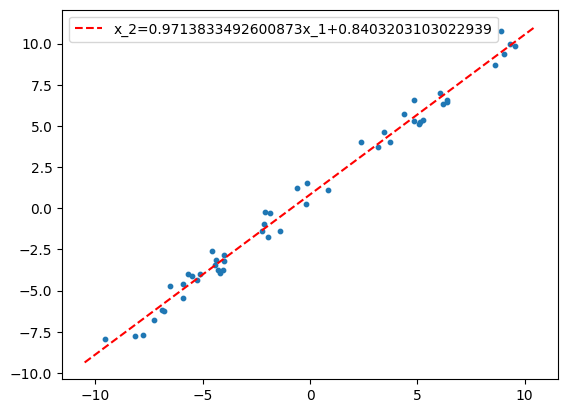

In [51]:
alpha = 0.001
I = np.identity(2)  # Identity matrix for regularization
XtX = np.matmul(np.transpose(X), X)
XtX_reg = XtX + alpha * I
XtX_reg_inv = np.linalg.inv(XtX_reg)
X_pi = np.matmul(XtX_reg_inv, np.transpose(X))
w = np.matmul(X_pi, Y)

X1 = [i[1] for i in data]
Y = [i[2] for i in data]
plt.scatter(X1, Y, s=10)
abline(w[1], w[0], color='r')
plt.legend()
plt.show()

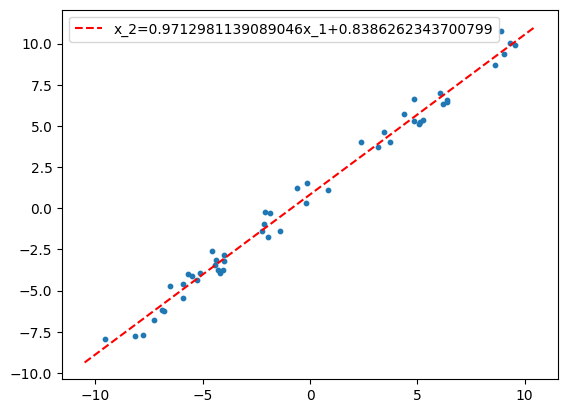

In [52]:
alpha = 0.1
I = np.identity(2)  # Identity matrix for regularization
XtX = np.matmul(np.transpose(X), X)
XtX_reg = XtX + alpha * I
XtX_reg_inv = np.linalg.inv(XtX_reg)
X_pi = np.matmul(XtX_reg_inv, np.transpose(X))
w = np.matmul(X_pi, Y)

X1 = [i[1] for i in data]
Y = [i[2] for i in data]
plt.scatter(X1, Y, s=10)
abline(w[1], w[0], color='r')
plt.legend()
plt.show()

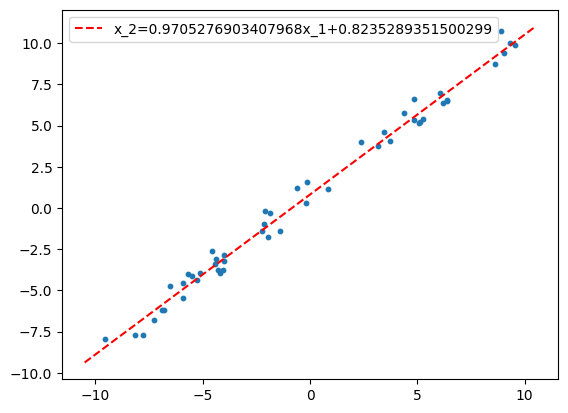

In [53]:
alpha = 1
I = np.identity(2)  # Identity matrix for regularization
XtX = np.matmul(np.transpose(X), X)
XtX_reg = XtX + alpha * I
XtX_reg_inv = np.linalg.inv(XtX_reg)
X_pi = np.matmul(XtX_reg_inv, np.transpose(X))
w = np.matmul(X_pi, Y)

X1 = [i[1] for i in data]
Y = [i[2] for i in data]
plt.scatter(X1, Y, s=10)
abline(w[1], w[0], color='r')
plt.legend()
plt.show()

In [54]:
alphas = [0,0.001,0.1,1]

best_alpha = None
best_mse = float('inf')

for alpha in alphas:
    mse_list = []
    kf = KFold(n_splits=5)  # 5-fold cross-validation using sklearn
    for p, q in kf.split(X):
        X_train, X_test = np.array(X)[p], np.array(X)[q]
        Y_train, Y_test = np.array(Y)[p], np.array(Y)[q]

        I = np.identity(2)
        XtX = np.matmul(np.transpose(X_train), X_train)
        XtX_reg = XtX + alpha * I
        XtX_reg_inv = np.linalg.inv(XtX_reg)
        X_pi = np.matmul(XtX_reg_inv, np.transpose(X_train))
        w = np.matmul(X_pi, Y_train)

        Y_pred = np.matmul(X_test, w)
        mse = mean_squared_error(Y_test, Y_pred)
        mse_list.append(mse)

    avg_mse = np.mean(mse_list)
    print(f"Alpha: {alpha}, Average MSE: {avg_mse}")

    if avg_mse < best_mse:
        best_mse = avg_mse
        best_alpha = alpha

print(f"\nBest Alpha: {best_alpha}, Best Average MSE: {best_mse}")

Alpha: 0, Average MSE: 0.39344264049477945
Alpha: 0.001, Average MSE: 0.39344147002151403
Alpha: 0.1, Average MSE: 0.39333079154492295
Alpha: 1, Average MSE: 0.3927752885509607

Best Alpha: 1, Best Average MSE: 0.3927752885509607
